In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"D:\Data Science\Internship\lnterview_confiedence_level\data_for _training\train",
                                          target_size=(224,224),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"D:\Data Science\Internship\lnterview_confiedence_level\data_for _training\test",
                                          target_size=(224,224),
                                          batch_size =32,
                                          class_mode = 'binary')
test_dataset.class_indices
#model building
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#fitting the model
r = model.fit(train_dataset,
         epochs =25,
         validation_data = test_dataset)
predictions = model.predict(test_dataset)
predictions = np.round(predictions)
predictions

# Save the model
model.save("keras_model.h5")

Found 4200 images belonging to 2 classes.
Found 1957 images belonging to 2 classes.
Epoch 1/25
132/132 [==============================] - 365s 3s/step - loss: 0.3806 - accuracy: 0.8290 - val_loss: 0.5268 - val_accuracy: 0.8600
Epoch 2/25
132/132 [==============================] - 353s 3s/step - loss: 0.2319 - accuracy: 0.8971 - val_loss: 0.3867 - val_accuracy: 0.8697
Epoch 3/25
132/132 [==============================] - 367s 3s/step - loss: 0.2051 - accuracy: 0.9093 - val_loss: 0.5258 - val_accuracy: 0.8615
Epoch 4/25
132/132 [==============================] - 350s 3s/step - loss: 0.1921 - accuracy: 0.9148 - val_loss: 0.5349 - val_accuracy: 0.8636
Epoch 5/25
132/132 [==============================] - 350s 3s/step - loss: 0.1844 - accuracy: 0.9174 - val_loss: 0.5518 - val_accuracy: 0.8738
Epoch 6/25
132/132 [==============================] - 353s 3s/step - loss: 0.1832 - accuracy: 0.9131 - val_loss: 0.7077 - val_accuracy: 0.8620
Epoch 7/25
132/132 [==============================] - 334s

c:\Users\hithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 151ms/step


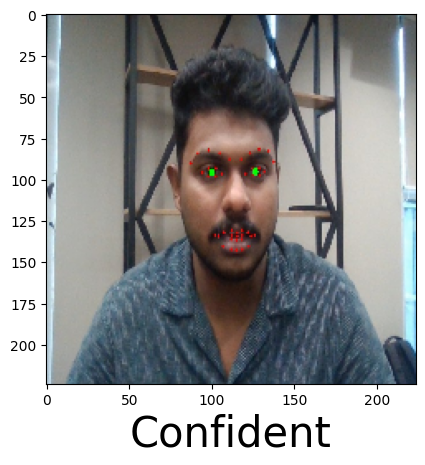

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model("D:\Data Science\Internship\lnterview_confiedence_level\keras_model.h5")

def predict_image(filename):
    img = image.load_img(filename, target_size=(224, 224))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Preprocess the input image
    img_array /= 255.0

    # Make prediction
    predictions = loaded_model.predict(img_array)
    class_label = "Confident" if predictions[0][0] < 0.5 else "Not Confident"
    
    plt.xlabel(class_label, fontsize=30)
    plt.show()

# Example usage
predict_image(r"D:\Data Science\Internship\lnterview_confiedence_level\data_for _training\test\Confident\photo_397 (2).jpg")


1/1 [==============================] - 0s 79ms/step


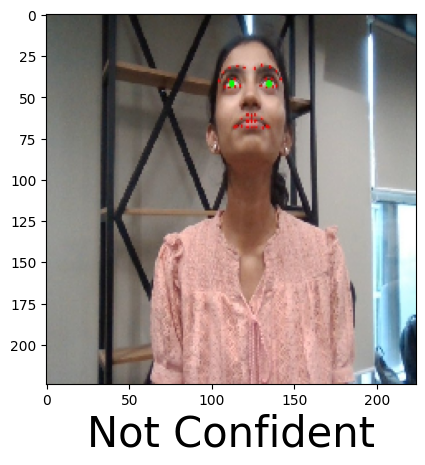

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model("D:\Data Science\Internship\lnterview_confiedence_level\keras_model.h5")

def predict_image(filename):
    img = image.load_img(filename, target_size=(224, 224))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Preprocess the input image
    img_array /= 255.0

    # Make prediction
    predictions = loaded_model.predict(img_array)
    class_label = "Confident" if predictions[0][0] < 0.5 else "Not Confident"
    
    plt.xlabel(class_label, fontsize=30)
    plt.show()

# Example usage
predict_image(r"D:\Data Science\Internship\lnterview_confiedence_level\data_for _training\test\Not_Confident\photo_580.jpg")

1/1 [==============================] - 0s 99ms/step


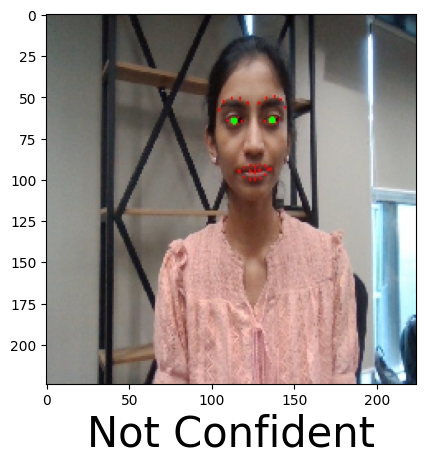

In [6]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model("D:\Data Science\Internship\lnterview_confiedence_level\keras_model.h5")

def predict_image(filename):
    img = image.load_img(filename, target_size=(224, 224))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Preprocess the input image
    img_array /= 255.0

    # Make prediction
    predictions = loaded_model.predict(img_array)
    class_label = "Confident" if predictions[0][0] < 0.5 else "Not Confident"
    
    plt.xlabel(class_label, fontsize=30)
    plt.show()

# Example usage
predict_image(r"D:\Data Science\Internship\lnterview_confiedence_level\data_for _training\test\Not_Confident\photo_692.jpg")